> Created on Thu Dec 29 18:14:02 2022 @author: Richie Bao-caDesign设计(cadesign.cn)

In [1]:
import networkx as nx
import pprint

In [3]:
def G_drawing(G,edge_labels=None,node_labels=None,**kwargs):
    import matplotlib.pyplot as plt
    import networkx as nx
    
    options={
    "font_size": 20,
    "font_color":"black",
    "node_size": 150,
    "node_color": "olive",
    "edgecolors": "olive",
    "linewidths": 7,
    "width": 1,
    "with_labels":True,    
    }
    options.update((k, kwargs[k]) for k in set(kwargs).intersection(options))
    
    style={
    "figsize":(3,3),   
    "tight_layout":True,
    "pos_func":nx.spring_layout,
    "edge_label_font_size":10,
    "pos":None
    }
    
    style.update((k, kwargs[k]) for k in set(kwargs).intersection(style))        
    fig,ax=plt.subplots(figsize=style['figsize'],tight_layout=style["tight_layout"]) 
    
    if style['pos']:
        pos=style['pos']
    else:
        pos=list(map(style["pos_func"],[G]))[0]    
    
    if node_labels:
        options["with_labels"]=False
        nx.draw(G, pos=pos,ax=ax,**options)
        node_labels=nx.get_node_attributes(G,node_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels,ax=ax)
    else:
        nx.draw(G, pos=pos,ax=ax,**options)
        
    
    if edge_labels:
        edge_labels=nx.get_edge_attributes(G,edge_labels)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,ax=ax,font_size=style["edge_label_font_size"])
    
    plt.show()      

### 2.7.1.1 复杂网络算法（Algorithms）

#### 1）Approximations and Heuristics（近似值和启发式方法）

* Connectivity（连通性）

一个网络的健壮程度是指它不容易因为节点的移除使得源汇节点连接断开，因此节点的连通性指，要断开源汇节点的连通所要移除的最小节点数。可以证明，连通性也等于节点之间独立于节点的路径数，因此可以通过计算独立于节点的路径数来量化网络的健壮性<sup>[1]</sup>。

`all_pairs_node_connectivity`(G[, nbunch, cutoff])

计算所有节点对之间的节点连通性，为节点独立路径的数量（除源汇节点外不共享节点的路径）。

> 源汇是指两个节点，未指定为有向图，则可以为有向图也可以为无向图。

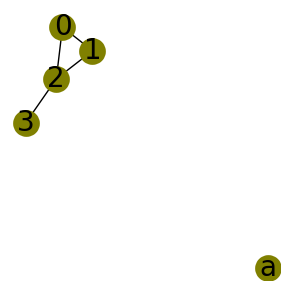

{0: {1: 2, 2: 2, 3: 1, 'a': 0},
 1: {0: 2, 2: 2, 3: 1, 'a': 0},
 2: {0: 2, 1: 2, 3: 1, 'a': 0},
 3: {0: 1, 1: 1, 2: 1, 'a': 0},
 'a': {0: 0, 1: 0, 2: 0, 3: 0}}


In [440]:
G=nx.cycle_graph(3)
G.add_node("a")
G.add_edge(2, 3)
G_drawing(G) 
pprint.pprint(nx.all_pairs_node_connectivity(G))    

`local_node_connectivity`(G, source, target, cutoff=None)

计算给定源汇节点之间的连通性。

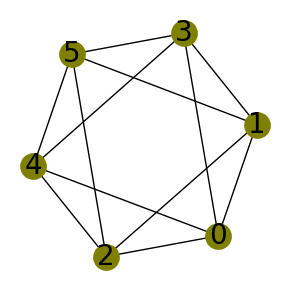

4

In [141]:
from networkx.algorithms import approximation as approx
G=nx.octahedral_graph()
G_drawing(G) 
approx.local_node_connectivity(G, 1,3)

`node_connectivity`(G[, s, t])

返回一个图的近似节点连通性，即断开一个节点的最小连通性。

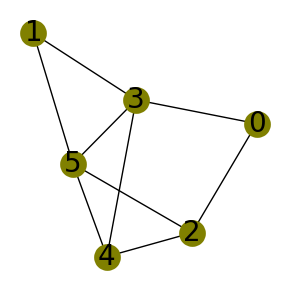

2


In [167]:
from networkx.algorithms import approximation as approx
G=nx.octahedral_graph()
G.remove_edges_from([(0,4),(1,2),(0,1)])
G_drawing(G)
print(approx.node_connectivity(G))

* K-components（K-分量）<sup>[2][3][4]</sup>

`k_components`(G[, min_density])

K-component是图G的一个最大子图，节点连通性至少为K。因为K-components在连通性方面是嵌套的，因此有一个固有的层次结构，例如连通性为1时（$K=1$）即为图G，将图G断开为两个子图（K-components），满足$K \geq 2$，其中子图G_sub_k2_0的连通性为2，G_sub_k2_1的连通性为3，因此当满足$K \geq 3$时，K-components为子图G_sub_k2_1。`apxa.k_components`方法的返回值就是以`K`为键，以大于等于`K`值连通性的子图几点为值。

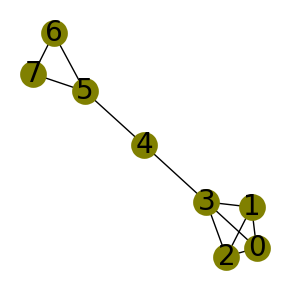

defaultdict(<class 'list'>, {1: [{0, 1, 2, 3, 4, 5, 6, 7}], 2: [{5, 6, 7}, {0, 1, 2, 3}], 3: [{0, 1, 2, 3}]})
1 2 3


In [178]:
from networkx.algorithms import approximation as apxa

G=nx.lollipop_graph(4, 3)
G.add_edges_from([(6,7),(5,7)])
G_drawing(G)
k_components=apxa.k_components(G)
print(k_components)

G_sub_k2_0=G.subgraph(k_components[2][0])
G_sub_k2_1=G.subgraph(k_components[2][1])
print(approx.node_connectivity(G),approx.node_connectivity(G_sub_k2_0),approx.node_connectivity(G_sub_k2_1))

* Clique（分团）

团（Clique）是无向图中顶点的子集，满足每两个不同的节点都是相邻的，其子图为完全图。

`maximum_independent_set`(G)

返回一个近似的最大独立集。独立集或稳定集是一个图中的顶点集，其中没有两个是相邻的。例如对于集合`set_Max`，每两个节点之间都没有可连接的边。独立集的大小是它所包含的顶点数量<sup>[5]</sup>。

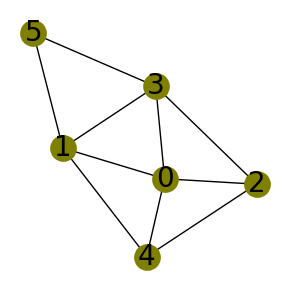

({3, 4}, [{0, 1, 3}, {2, 4}, {5}])

In [242]:
from networkx.algorithms.approximation import clique

G=nx.erdos_renyi_graph(6, 0.7, seed=10)
G_drawing(G)
clique.clique_removal(G)

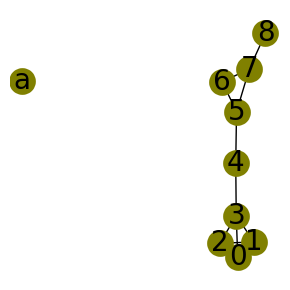

{0, 4, 6, 8, 'a'}


In [204]:
G=nx.lollipop_graph(4, 3)
G.add_edges_from([(6,7),(5,7),(7,8)])
G.add_node("a")
G_drawing(G)
set_Max=clique.maximum_independent_set(G)
print(set_Max)

`max_clique`(G)<sup>[6]<sup>

找出最大集（Clique）。集的大小就是集中所包含的顶点数。

In [205]:
clique.max_clique(G)

{0, 1, 2, 3}

`clique_removal`(G)<sup>[6]<sup>

反复的从图中移除集。返回值包括最大独立集，和反复移除后最大集列表。

In [206]:
clique.clique_removal(G)

({0, 4, 6, 8, 'a'}, [{0, 1, 2, 3}, {4, 5}, {6, 7}, {8}, {'a'}])

`large_clique_size`(G)<sup>[7]</sup>

计算图中最大集的大小。集是一个图节点的子集，其中每一对节点都是相邻的。

In [207]:
clique.large_clique_size(G)

4

* Clustering（聚类系数）

聚类系数（Clustering coefficients），是图中节点倾向于聚类在一起的程度的度量。一个节点的局部聚类系数量化了它的邻居节点离成为团（clique）有多近，即节点的一跳邻域内封闭的三角形的比例，或者为邻居之间实际实现的连接与所有可能连接的数量的比例。例如，对于图G1、G2和G3，分析节点`A`的聚类系数，计算用`networkx.algorithms.cluster`模块提供的`clustering`方法：

1. 邻居之间实际实现的连接与所有可能连接的数量的比例：节点`A`的邻居节点为（`P1`,`P2`,`P3`），`P1`,`P2`,`P3`之间最多可以有3个连接，对于图G1包含全部3个连接，对于图G2含1个连接，对于图G3不会连接，因此聚类系数分别为3/3=1、1/3=0.333和0/3=0；
2. 邻居内封闭的三角形的比例：节点`A`的邻居节点为（`P1`,`P2`,`P3`），与节点`A`最多形成3个三角形，$ \bigtriangleup AP1P2 $，$ \bigtriangleup AP1P3 $和$ \bigtriangleup AP2P3$，对于图G1、G2和G3符合条件的三角形数量分别为3，1和0，因此聚类系数分别为3/3=1、1/3=0.333和0/3=0。

`average_clustering`(G[, trials, seed])<sup>[8]</sup>

估计图G的平均聚类系数，为局部聚类的平均值。。

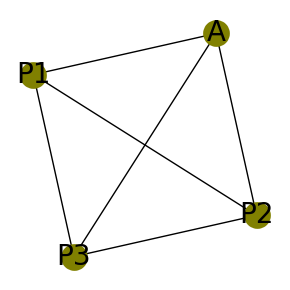

1.0
1.0


In [258]:
from networkx.algorithms.cluster import clustering
from networkx.algorithms import approximation

G1=nx.Graph()
G1.add_edges_from([("P1","P2"),("P1","P3"),("P2","P3"),("A","P1"),("A","P2"),("A","P3")])
G_drawing(G1)
print(clustering(G1,"A"))
print(approximation.average_clustering(G1, trials=1000, seed=10) )

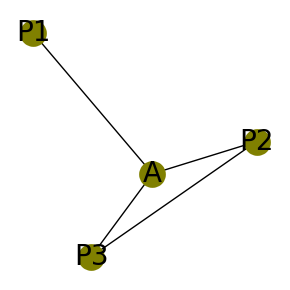

0.3333333333333333


0.579

In [259]:
G2=nx.Graph()
G2.add_edges_from([("P2","P3"),("A","P1"),("A","P2"),("A","P3")])
G_drawing(G2)
print(clustering(G2,"A"))
print(approximation.average_clustering(G2, trials=1000, seed=10))

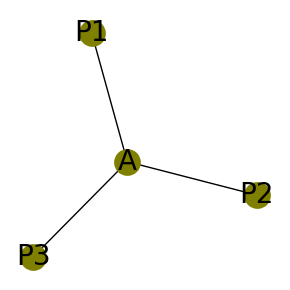

0
0.0


In [261]:
G3=nx.Graph()
G3.add_edges_from([("A","P1"),("A","P2"),("A","P3")])
G_drawing(G3)
print(clustering(G3,"A"))
print(approximation.average_clustering(G3, trials=1000, seed=10))   

* Distance Measures（距离测量）

`diameter`(G[, seed])<sup>[9][10]</sup>

返回图G直径的下限（即最大偏心率），为任意两个顶点间距离的最大值。距离是指两个点之间的所有路的长度的最小值。

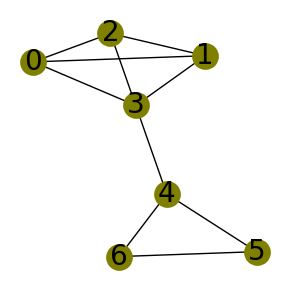

3

In [266]:
from networkx.algorithms.approximation.distance_measures import diameter
G=nx.lollipop_graph(4, 3)
G.add_edges_from([(4,6)])
G_drawing(G)
diameter(G)

* Dominating Set （制约集/支配集/控制集）

Dominating Set（支配集）指一个图的特殊节点子集。设A是图G的一个节点子集，若G中任何不在A中的节点都与A中的节点相邻，则称A为G的一个支配集，图G最小支配集的基数称为图G的支配数，也称外固数。

`min_weighted_dominating_set`(G, weight=None)<sup>[11]</sup>

返回一个接近最小权重节点的支配集。

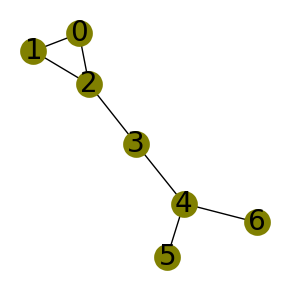

{2, 4}

In [272]:
from networkx.algorithms.approximation.dominating_set import min_weighted_dominating_set
G=nx.lollipop_graph(3, 3)
G.add_edges_from([(4,6)])
G_drawing(G)
min_weighted_dominating_set(G)

`min_edge_dominating_set`(G)

类似点的支配集，对于边的支配集，设F是图G的一个边的子集，若G中的任何不在F中的边都可关联到F中至少一条边的断点，则称F为图G的边的一个支配集。

In [273]:
from networkx.algorithms.approximation.dominating_set import min_edge_dominating_set

min_edge_dominating_set(G)

{(0, 1), (2, 3), (4, 5)}

* Matching（匹配）<sup>[12]</sup>

设图$G=(V,E)$，$M \subseteq E$，如果M中任何两条边都不邻接，即没有两条边共享一个公共顶点，则称M为G的一个匹配或边独立集。设$v \subseteq V$，若存在$e \subseteq M$，使得v是e的一端点,则称v是M-饱和的，否则称v是M-非饱和的。

如果匹配M是图G的极大匹配（ maximal matching）（不唯一），则它不是任何其他匹配的子集。 如果图G中的每条边都与M中的至少一条边有非空交集，则图G的匹配M是最大的，如图中红边：<img src="./imgs/2_8_1/2_8_1_01.png" height='auto' width='auto' title="caDesign">


最大匹配（maximum matching ）也称之为最大基数匹配（maximum-cardinality matching）（唯一），是包含最大可能边数的匹配。最大匹配属于极大匹配，但极大匹配不一定为最大匹配。如图中红边：<img src="./imgs/2_8_1/2_8_1_02.png" height='auto' width='auto' title="caDesign">

`min_maximal_matching`(G)

返回图G最小的极大匹配。

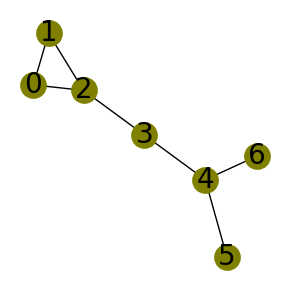

{(0, 1), (2, 3), (4, 5)}

In [275]:
from networkx.algorithms.approximation.matching import min_maximal_matching
G=nx.lollipop_graph(3, 3)
G.add_edges_from([(4,6)])
G_drawing(G)
min_maximal_matching(G)

* Ramsey（拉姆齐数）

`ramsey_R2`(G)

返回图G中的最大团和最大独立集。可以用于估计图G的二染色拉姆齐数（2-color Ramsey number ）$R(2;s,t)$的边界。

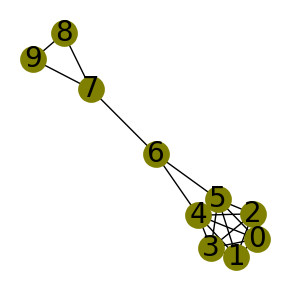

({0, 1, 2, 3, 4, 5}, {0, 6, 8})

In [284]:
from networkx.algorithms.approximation.ramsey import ramsey_R2

G=nx.lollipop_graph(6, 3)
G.add_edges_from([(8,9),(7,9)])
G.add_edges_from([(4,6)])
G_drawing(G)
ramsey_R2(G)

* Steiner Tree（斯坦纳树）

`metric_closure`(G[, weight])

返回图的度量闭包（ metric closure）。

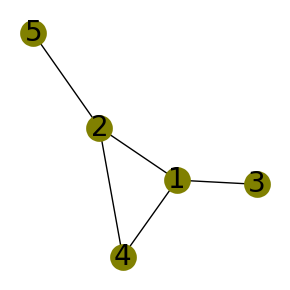

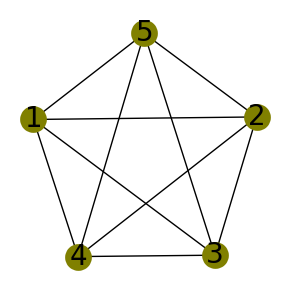

In [305]:
from networkx.algorithms.approximation.steinertree import metric_closure

G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,4),(1,4),(2,5)])
G_drawing(G)
F=metric_closure(G)
G_drawing(F)

`steiner_tree`(G, terminal_nodes, weight='weight')<sup>[13]</sup>

给定顶点（`termianl_nodes`），图G最小的斯坦纳树为跨越这些顶点，最小边权重和的树。

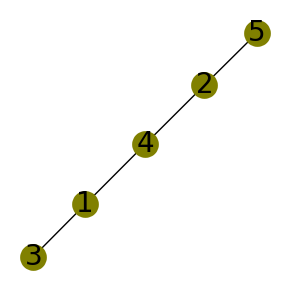

In [307]:
from networkx.algorithms.approximation.steinertree import steiner_tree
F=steiner_tree(G,[3,5,4])
G_drawing(F)

* Travelling Salesman Problem，TSP（旅行商问题）

`christofides`(G, weight='weight', tree=None)

旅行商问题的近似解。

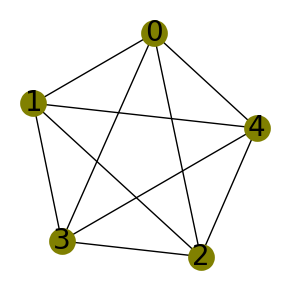

[0, 3, 2, 4, 1, 0]

In [312]:
from networkx.algorithms.approximation.traveling_salesman import christofides

G=nx.erdos_renyi_graph(5, 1, seed=10)
G_drawing(G)
christofides(G)

`traveling_salesman_problem`(G, weight='weight', nodes=None, cycle=True, method=None)

求图G中指定顶点的最短路径。该函数可以近似求解非完全图或推销员不需要访问所有网络节点的旅行商问题。

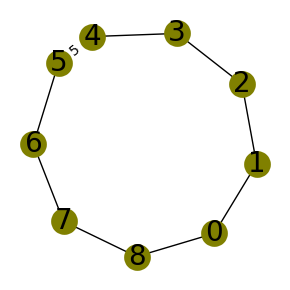

[3, 2, 1, 0, 8, 7, 6, 7, 8, 0, 1, 2, 3]

In [319]:
tsp=nx.approximation.traveling_salesman_problem
G=nx.cycle_graph(9)
G[4][5]["weight"]=5
G_drawing(G,edge_labels='weight')
tsp(G, nodes=[3, 6])

In [320]:
path=tsp(G, cycle=False)
path

[4, 3, 2, 1, 0, 8, 7, 6, 5]

自定义lambda函数传入`method`参数。

In [321]:
SA_tsp=nx.approximation.simulated_annealing_tsp
method=lambda G, wt: SA_tsp(G, "greedy", weight=wt, temp=500)
path=tsp(G, cycle=False, method=method)
print(path)

[5, 6, 7, 8, 0, 1, 2, 3, 4]


`greedy_tsp`(G[, weight, source])

从给定源出发，访问所有顶点返回到源，具有最短成本路径的循环（总成本最小化）。使用的算法为贪心算法（greedy algorithm）。贪心算法并不总能给出最佳解决方案。 但是，它可以构建第一个可行的解决方案，该解决方案可以作为参数传递给迭代改进算法，例如模拟退火（Simulated Annealing,）或阈值接收（Threshold Accepting）。

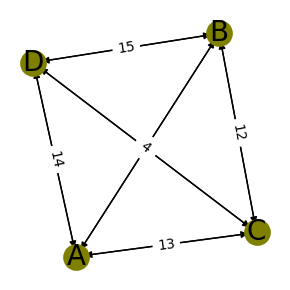

['D', 'C', 'B', 'A', 'D']
31


In [325]:
from networkx.algorithms import approximation as approx
G=nx.DiGraph()
G.add_weighted_edges_from({
    ("A", "B", 3), ("A", "C", 17), ("A", "D", 14), ("B", "A", 3),
    ("B", "C", 12), ("B", "D", 16), ("C", "A", 13),("C", "B", 12),
    ("C", "D", 4), ("D", "A", 14), ("D", "B", 15), ("D", "C", 2)
})
G_drawing(G,edge_labels='weight')
cycle=approx.greedy_tsp(G, source="D")
cost=sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
print(cycle)
print(cost)

`simulated_annealing_tsp`(G, init_cycle[, ...])

该函数使用模拟退火（simulated annealing）算法估计最小成本循环路径，返回旅行商问题的近似解。该算法从次优解开始，模拟退火扰乱该解，偶尔接受使解更糟的变化以逃避局部最优解。 接受此类更改的机会在迭代过程中会减少，以鼓励获得最佳结果，最后该函数返回一个从总成本最小化的源开始的循环，且还返回成本。

In [326]:
cycle=approx.simulated_annealing_tsp(G, "greedy", source="D")
cost=sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
print(cycle)
print(cost)

['D', 'C', 'B', 'A', 'D']
31


可以将`greedy_tsp`解算的结果传递给参数`init_cycle`作为次优解。

In [327]:
incycle=["D", "B", "A", "C", "D"]
cycle=approx.simulated_annealing_tsp(G, incycle, source="D")
cost=sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
print(cycle)
print(cost)

['D', 'C', 'B', 'A', 'D']
31


`threshold_accepting_tsp`(G, init_cycle[, ...])

该函数使用阈值接收（simulated annealing）算法估计最小成本循环路径，返回旅行商问题的近似解。

In [328]:
cycle=approx.threshold_accepting_tsp(G, "greedy", source="D")
cost=sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
print(cycle)
print(cost)

['D', 'C', 'B', 'A', 'D']
31


In [329]:
incycle=["D", "B", "A", "C", "D"]
cycle=approx.threshold_accepting_tsp(G, incycle, source="D")
cost=sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
print(cycle)
print(cost)

['D', 'C', 'B', 'A', 'D']
31


`asadpour_atsp`(G[, weight, seed, source])

返回旅行商问题的近似解。该近似解是Asadpour等人开发的非对称旅行商问题最著名的近似解之一<sup>[14]</sup>。

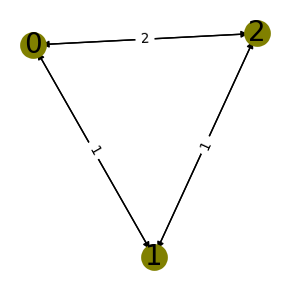

[0, 2, 1, 0]


In [331]:
import networkx as nx
import networkx.algorithms.approximation as approx
G=nx.complete_graph(3, create_using=nx.DiGraph)
nx.set_edge_attributes(G, {(0, 1): 2, (1, 2): 2, (2, 0): 2, (0, 2): 1, (2, 1): 1, (1, 0): 1}, "weight")
G_drawing(G,edge_labels='weight')
tour=approx.asadpour_atsp(G,source=0)
print(tour)

* Treewidth（树宽）<sup>[15]</sup>

图$G=(V,E)$的树分解（tree decomposition）是具有节点$X_{1}, \ldots , X_{n}$的树$T$，式中每个$X_{i}$是$V$的一个子集，满足以下属性（对于图使用术语顶点vertice，对于树使用术语节点node以示区分）：

1. 所有集合$X_{i}$的并集等于$V$，即图中的每个顶点都被包含在至少一个树中的节点中；
2. 如果$X_{i}$和$X_{j}$节点都包含一个顶点$v$，则$X_{i}$和$X_{j}$节点之间路径（唯一）中树T的所有节点$X_{k}$也包含顶点$v$，即包含顶点$v$树T的节点构成了树T子树间的连通；
3. 对于图中的每条边$(v,w)$，都有一个包含$v$和$w$的子集$X_{i}$，即只有当相应的子树中有一个共同的节点时，顶点在图中才相邻。

树分解的宽度是其最大集合$X_{i}$的大小减1。如图：

<img src="./imgs/2_8_1/2_8_1_03.png" height='auto' width='auto' title="caDesign">

该图具有8个顶点，将其分解为具有6个节点的树。图的每个边含两个顶点，一起被包含于树中的多个节点中，且图的每个顶点都在树的连续子树中列出。因为树的每个节点最多列出3个顶点，因此树宽为2。

`treewidth_min_degree`(G)<sup>[16][17][18]</sup>

使用最小度启发式（ Minimum Degree heuristic）返回树宽分解。

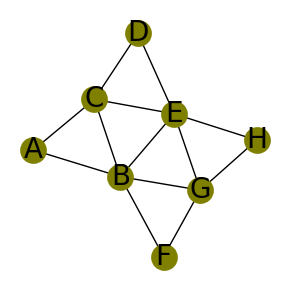

In [348]:
G=nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('B','C'),('B','F'),('B','G'),('B','E'),('C','E'),('C','D'),('G','H'),('G','E'),('D','E'),('F','G'),('H','E')])
G_drawing(G)

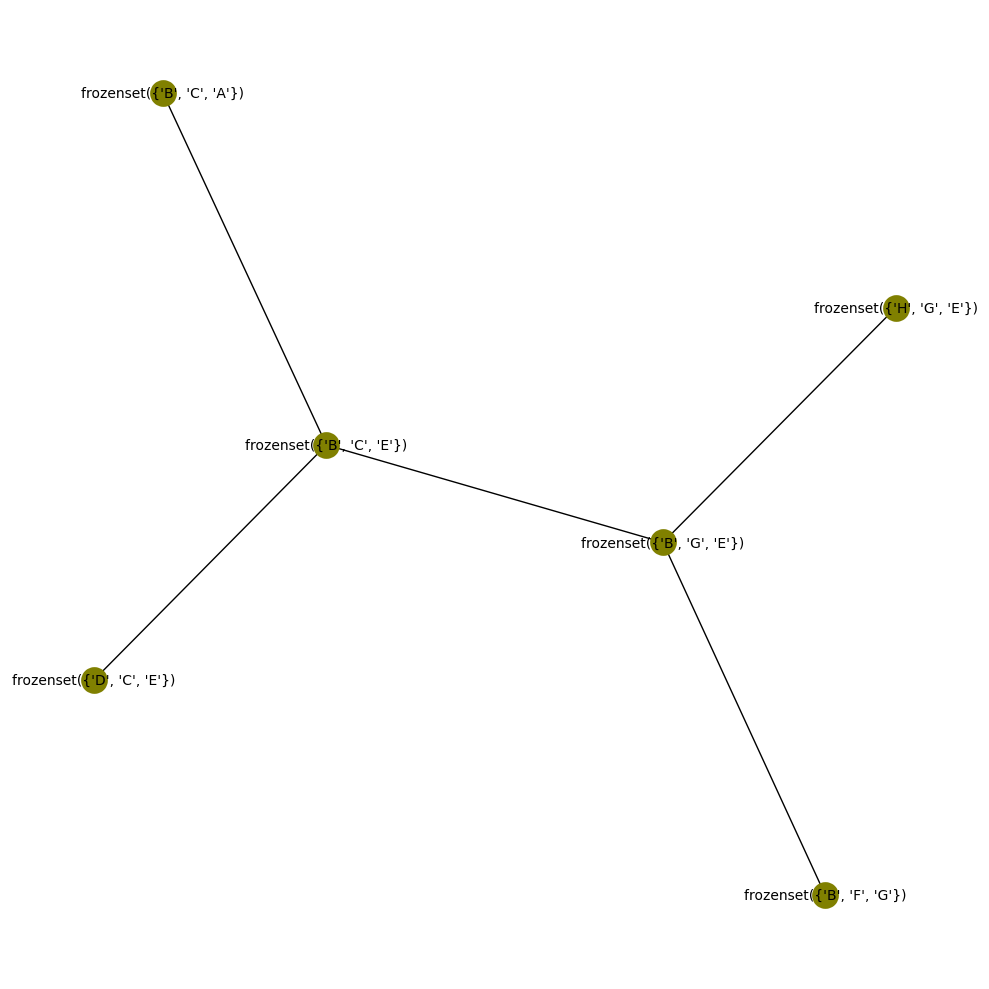

In [365]:
from networkx.algorithms.approximation.treewidth import treewidth_min_degree
treewidth,decomposed_tree=treewidth_min_degree(G)
G_drawing(decomposed_tree,figsize=(10,10),font_size=10)

`treewidth_min_fill_in`(G)<sup>[16][17][18]</sup>

使用最小填充启发式（ Minimum Fill-in heuristic）返回树宽分解。

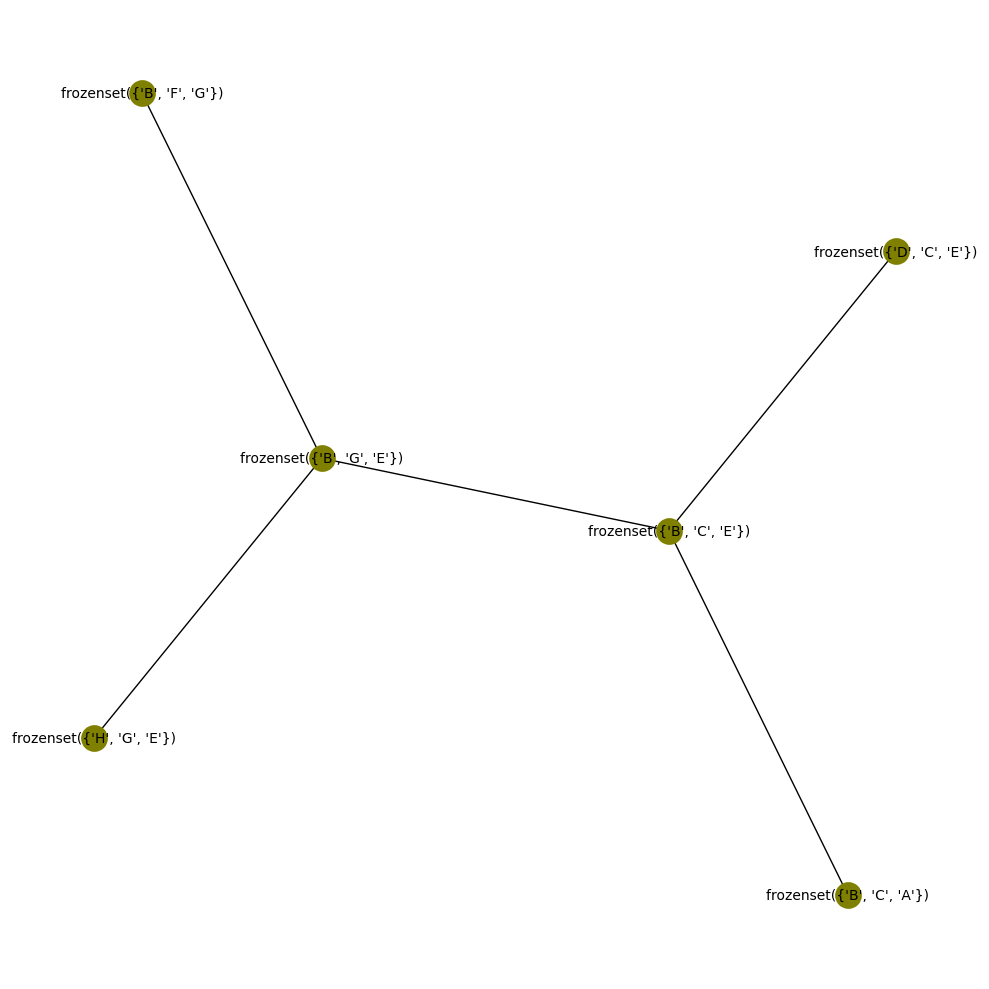

In [366]:
from networkx.algorithms.approximation.treewidth import treewidth_min_fill_in
treewidth,decomposed_tree=treewidth_min_fill_in(G)
G_drawing(decomposed_tree,figsize=(10,10),font_size=10)

* Vertex Cover（顶点覆盖）<sup>[19]</sup>

图G的顶点覆盖是一个顶点集合V，使得G中的每条边都接触V中的至少一个顶点，称集合V覆盖了图G的边。最小顶点覆盖是用最少的顶点来覆盖所有的边。顶点覆盖数是最小顶点覆盖的大小。

相应地，图G的边覆盖是一个边集合E，使得G中的每一个顶点都接触E中的至少一条边。 

如果只说覆盖，则通常是指顶点覆盖，而不是边覆盖。 

如图：<img src="./imgs/2_8_1/2_8_1_04.png" height='auto' width='auto' title="caDesign">

左上图红色顶点覆盖了四条边（标记为绿色），剩余两条黑边未覆盖。右上图红色顶点覆盖了三条边，剩余三条边未覆盖。下图用两个红色顶点完成了所有边的覆盖。


`min_weighted_vertex_cover`(G[, weight])<sup>[20]</sup>

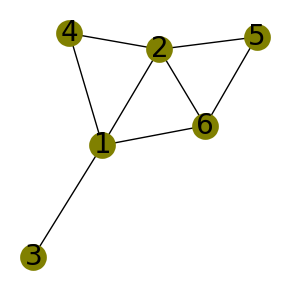

{1, 2, 5}

In [370]:
from networkx.algorithms.approximation.vertex_cover import min_weighted_vertex_cover
G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,4),(1,4),(2,5),(2,6),(5,6),(1,6)])
G_drawing(G)
min_weighted_vertex_cover(G)

* Max Cut（最大割）

最大割问题（Maximum Cut）是求一种分割方法，将图所有顶点分割成两群，同时使得被切断的边数量最大。当每条边都有权重的时候，则需要保证被切断的边权重和最大。

下述计算结果如图示：<img src="./imgs/2_8_1/2_8_1_06.png" height='auto' width='auto' title="caDesign">

`randomized_partitioning`(G[, seed, p, weight])

计算图顶点的随机分割及分割值。返回值`cut_size`为最小割值；`partition`为定义最小割的节点划分。

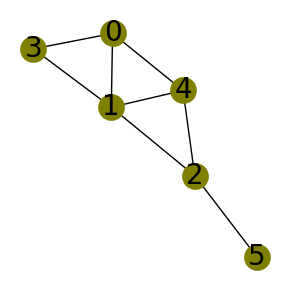

(5, ({1, 5}, {0, 2, 3, 4}))

In [4]:
import networkx as nx
from networkx.algorithms.approximation.maxcut import randomized_partitioning
G=nx.random_geometric_graph(6, radius=0.6, seed=3)
G_drawing(G)
randomized_partitioning(G)

`one_exchange`(G[, initial_cut, seed, weight])

计算图顶点的分割及分割值。使用贪心交换策略（greedy one exchange strategy）找到局部最大割及其值，添加到当前割并重复此过程，直到无法改进为止。

In [5]:
from networkx.algorithms.approximation.maxcut import one_exchange
one_exchange(G)

(6, ({1, 4, 5}, {0, 2, 3}))

#### 2）Assortativity（同配性）


* Assortativity（同配性）

同配性用于考察度值相近的节点是否倾向于相互连接。如果总体上度大的节点倾向于与度大的节点相连，则网络（图）的度是正相关，称网络是同配的。如果度大的节点倾向于与度小的节点相连，那么该网络的度是负相关的，称网络是异配的。同配系数是一种基于“度”的皮尔森相关系数，用来度量相连节点对的关系。如果值为正值，则代表具有相同度的点之间有某种协同关系；负值表示具有不同度数的节点间有某种联系。


顶点的度（degree）：图中与顶点$v$关联的边的条数称为顶点$v$的度，记为$deg(v)$；

顶点的出度（out-degree）：有向图中以顶点$v$为起点的有向边的条数称为顶点$v$的出度，记作$deg^{+} (v)$；

顶点的进度/入度（in-degree）：有向图中以顶点$v$为终点的有向边的条数称为顶点$v$的进度，记作$deg^{-} (v)$。


`degree_assortativity_coefficient`(G, x='out', y='in', weight=None, nodes=None)<sup>[21][22]</sup>

计算图顶点度同配系数。用于衡量基于顶点度，图中顶点连接的相似性。

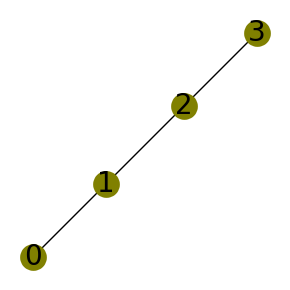

-0.5


In [421]:
G=nx.path_graph(4)
G_drawing(G)
r=nx.degree_assortativity_coefficient(G)
print(f"{r:3.1f}")

`attribute_assortativity_coefficient`(G, attribute)<sup>[21]</sup>

计算图顶点属性的同配系数。用于衡量给定属性，图中顶点连接的相似性。

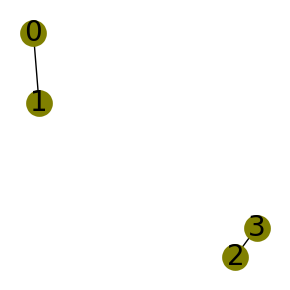

1.0


In [416]:
G=nx.Graph()
G.add_nodes_from([0, 1], color="red")
G.add_nodes_from([2, 3], color="blue")
G.add_edges_from([(0, 1), (2, 3)])
G_drawing(G)
print(nx.attribute_assortativity_coefficient(G, "color"))

`numeric_assortativity_coefficient`(G, attribute)<sup>[21]</sup>

计算图节点数值属性的同配系数。用于衡量给定顶点数值属性，图中顶点连接的相似性。

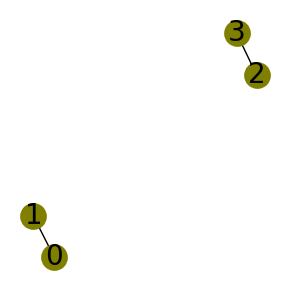

1.0


In [418]:
G=nx.Graph()
G.add_nodes_from([0, 1], size=2)
G.add_nodes_from([2, 3], size=3)
G.add_edges_from([(0, 1), (2, 3)])
G_drawing(G)
print(nx.numeric_assortativity_coefficient(G, "size"))

`degree_pearson_correlation_coefficient`(G[, ...])<sup>[21][22]</sup>

计算图顶点度同配系数。用于衡量基于顶点度，图中顶点连接的相似性。同`degree_assortativity_coefficient`，但是使用可能计算效率更高的`scipy.stats.pearsonrscipy.stats.pearsonr`方法。

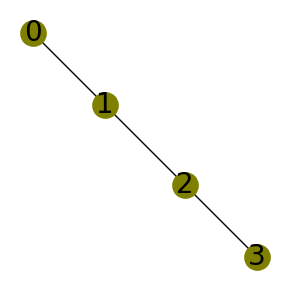

-0.5


In [422]:
G=nx.path_graph(4)
G_drawing(G)
r=nx.degree_pearson_correlation_coefficient(G)
print(f"{r:3.1f}")

* Average neighbor degree（平均邻域度）

`average_neighbor_degree`(G, source='out', target='out', nodes=None, weight=None)<sup>[23]</sup>

返回每一个顶点邻域顶点的平均度数。在无向图中，顶点$i$的邻域$N(i)$包括通过边连接到$i$的顶点。对于有向图，$N(i)$根据`source`参数确定：

1. 如果`source`参数为`in`，则$N(i)$由节点$i$的前驱顶点组成；
2. 如果`source`参数为`out`，则$N(i)$由节点$i$的后继顶点组成；
3.  如果`source`参数为`in+out`，则$N(i)$由节点$i$的前驱和后继顶点共同组成。

顶点$i$的平均邻域度为：$k_{nn,i} = \frac{1}{|N(i)|} \sum_{j \in N(i)} k_j$，式中，$N(i)$为顶点$i$的邻域；$k_j$是属于邻域$N(i)$顶点$j$的度。对于有向图，定义一个类似的度量，公式为： $k_{nn,i}^{w} = \frac{1}{s_i} \sum_{j \in N(i)} w_{ij} k_j$，式中，$s_i$是顶点$i$的加权度；$w_{ij}$是连接$i$和$j$的边权重；$N(i)$为顶点$i$的邻域。

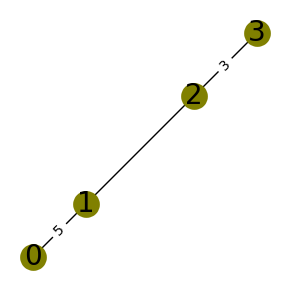

{0: 2.0, 1: 1.5, 2: 1.5, 3: 2.0}
{0: 2.0, 1: 1.1666666666666667, 2: 1.25, 3: 2.0}


In [428]:
G=nx.path_graph(4)
G.edges[0, 1]["weight"]=5
G.edges[2, 3]["weight"]=3
G_drawing(G,edge_labels='weight')
print(nx.average_neighbor_degree(G))
print(nx.average_neighbor_degree(G, weight="weight"))

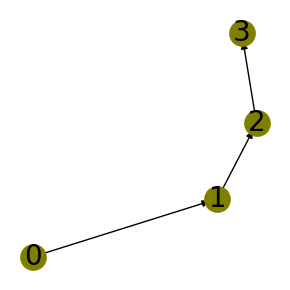

{0: 0.0, 1: 1.0, 2: 1.0, 3: 0.0}

In [430]:
G=nx.DiGraph()
nx.add_path(G, [0, 1, 2, 3])
G_drawing(G)
nx.average_neighbor_degree(G, source="in", target="in")

In [431]:
nx.average_neighbor_degree(G, source="out", target="out")

{0: 1.0, 1: 1.0, 2: 0.0, 3: 0.0}

* Average degree connectivity（平均连接度）

`average_degree_connectivity`(G[, source, ...])<sup>[23]</sup>

计算图的平均连接度，即度为$k$的顶点的平均邻域度。

> `k_nearest_neighbors`(G[, source, target, ...])方法将被启用，直接使用`average_degree_connectivity`。

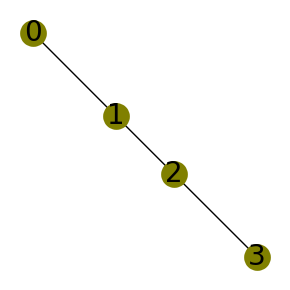

{1: 2.0, 2: 1.5}
{1: 2.0, 2: 1.75}


In [441]:
G=nx.path_graph(4)
G.edges[1, 2]["weight"]=3
G_drawing(G)
print(nx.average_degree_connectivity(G))
print(nx.average_degree_connectivity(G, weight="weight"))

* Mixing（混合）

`attribute_mixing_matrix`(G, attribute[, ...])

返回顶点属性连通的混合矩阵，如果`normalized`为False，返回的为属性对出现次数，例如$male \rightarrow male$出现次数为0，$male \rightarrow female$出现次数为1，$female \rightarrow male$出现次数为1，$female \rightarrow female$出现次数为2；为True则返回的为属性对出现的联合概率（ joint probability）。

> `numeric_mixing_matrix`(G, attribute, nodes=None, normalized=True, mapping=None)方法将被移除，直接用`attribute_mixing_matrix`方法，传入属性参数。

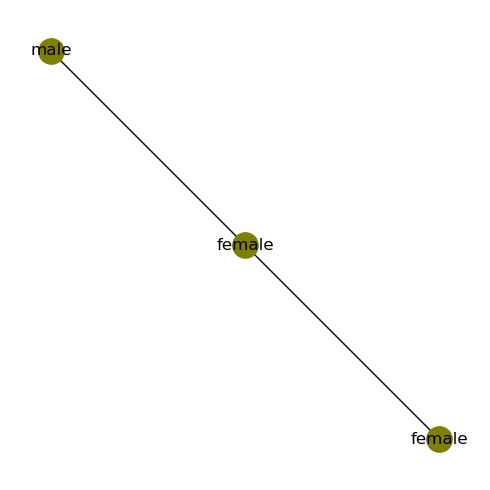

[[0. 1.]
 [1. 2.]]
1.0
[[0.   0.25]
 [0.25 0.5 ]]


In [455]:
G=nx.path_graph(3)
gender={0: 'male', 1: 'female', 2: 'female'}
nx.set_node_attributes(G, gender, 'gender')
G_drawing(G,node_labels='gender',figsize=(5,5))
mapping={'male': 0, 'female': 1}
mix_mat=nx.attribute_mixing_matrix(G, 'gender', mapping=mapping,normalized=False)
# mixing from male nodes to female nodes
print(mix_mat)
print(mix_mat[mapping['male'], mapping['female']])
print(nx.attribute_mixing_matrix(G, 'gender', mapping=mapping))

`degree_mixing_matrix`(G[, x, y, weight, ...])

返回顶点度连通的混合矩阵，例如下图顶点度只有1和3两种情况，度为1的顶点连通到度为3的顶点次数为3，度为3的顶点连通到度为1的顶点次数为3，无其它情况，因此矩阵其它位置为0。

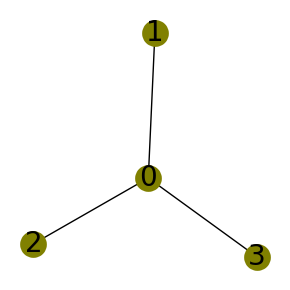

[[0. 3.]
 [3. 0.]]


3.0

In [466]:
G=nx.star_graph(3)
mix_mat=nx.degree_mixing_matrix(G,normalized=False)
G_drawing(G)
print(mix_mat)
mix_mat[0, 1]  # mixing from node degree 1 to node degree 3

可以使用`mapping`参数，显示所有的度，即使度值不存在于图中，例如度为0、1、2、3的混合矩阵。

In [467]:
max_degree=max(deg for n, deg in G.degree)
mapping={x: x for x in range(max_degree + 1)} # identity mapping
mix_mat=nx.degree_mixing_matrix(G, mapping=mapping,normalized=False)
print(mix_mat)
mix_mat[3, 1]  # mixing from node degree 3 to node degree 1

[[0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 3. 0. 0.]]


3.0

`degree_mixing_dict`(G, x='out', y='in', weight=None, nodes=None, normalized=False)

返回以字典形式存储的顶点度连通次数或者联合概率。

In [468]:
nx.degree_mixing_dict(G)

{3: {1: 3}, 1: {3: 3}}

`attribute_mixing_dict`(G, attribute[, nodes, ...])

返回字典表示的顶点属性混合矩阵。

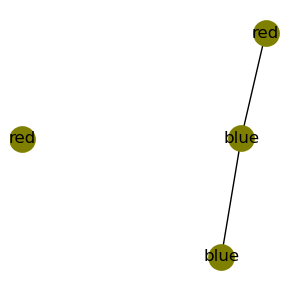

{'red': {'blue': 1}, 'blue': {'blue': 2, 'red': 1}}
1
1


In [465]:
G=nx.Graph()
G.add_nodes_from([0, 1], color="red")
G.add_nodes_from([2, 3], color="blue")
G.add_edges_from([(1, 3),(2,3)])
G_drawing(G,node_labels='color')
d=nx.attribute_mixing_dict(G, "color")
print(d)
print(d["red"]["blue"])
print(d["blue"]["red"])  # d symmetric for undirected graphs


`mixing_dict`(xy[, normalized])

给定元组列表的方式计算“顶点”的混合矩阵。

In [472]:
nx.mixing_dict([(1,2),(3,4),(2,1),(3,4)])

{1: {2: 1}, 2: {1: 1}, 3: {4: 2}, 4: {}}

* Pairs（对）

`node_attribute_xy`(G, attribute[, nodes])

返回图G所有边的顶点属性对列表。

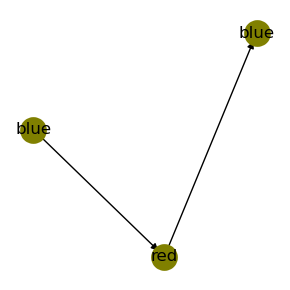

[('red', 'blue'), ('blue', 'red')]

In [475]:
G=nx.DiGraph()
G.add_node(1, color="red")
G.add_node(2, color="blue")
G.add_node(3, color="blue")
G.add_edge(1, 2)
G.add_edge(3, 1)
G_drawing(G,node_labels='color')
list(nx.node_attribute_xy(G, "color"))

`node_degree_xy`(G[, x, y, weight, nodes])

返回图G所有边的顶点度值对列表。

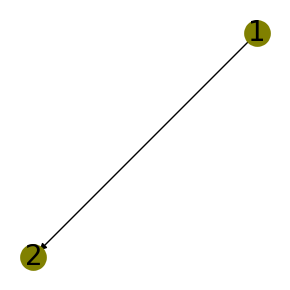

[(1, 1)]
[(0, 0)]


In [476]:
G=nx.DiGraph()
G.add_edge(1, 2)
G_drawing(G)
print(list(nx.node_degree_xy(G, x="out", y="in")))
print(list(nx.node_degree_xy(G, x="in", y="out")))

#### 3）Asteroidal（小行星）

`is_at_free`(G)

如果图中找不到小行星三元组（asteroidal triple ），则图为AT-free图，返回True，否则返回False。

`find_asteroidal_triple`(G)<sup>[24]</sup>

小行星三元组是不相邻顶点的三元组，使得它们中的任何两个之间都存在一条路径，从而避免了第三个顶点的封闭邻域。小行星三元组作为节点列表返回。

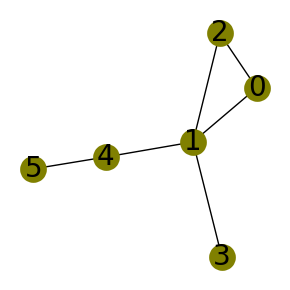

True
None


In [480]:
G=nx.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (4, 5)])
G_drawing(G)
print(nx.is_at_free(G))
print(nx.find_asteroidal_triple(G))

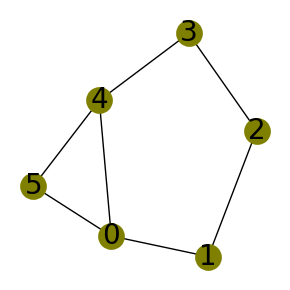

False
[1, 5, 3]


In [483]:
G=nx.cycle_graph(6)
G.add_edge(0,4)
# G.add_edge(1,5)
G_drawing(G)
print(nx.is_at_free(G))
print(nx.find_asteroidal_triple(G))

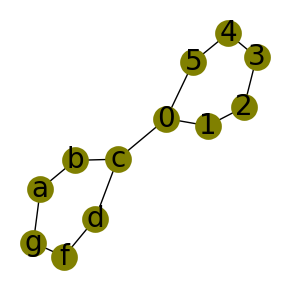

False
[2, 'c', 4]


In [499]:
G1=nx.cycle_graph(6)
G2=nx.cycle_graph(6)
mapping={0: "a", 1: "b", 2: "c",3:"d",4:"f",5:"g"}
G2_relabel=nx.relabel_nodes(G2, mapping)
G=nx.Graph()
G.add_edges_from(G1.edges(data=True))
G.add_edges_from(G2_relabel.edges(data=True))
G.add_edges_from([("c",0)])
# G.add_edge(1,5)
G_drawing(G)
print(nx.is_at_free(G))
print(nx.find_asteroidal_triple(G))

#### 4）Bipartite（二部图）

对于二部图$B=(U,V,E)$，式中$U$和$V$为两个顶点集，$E$为边集，对于$E$只连接相反顶点集，即边的一个顶点在$U$中,另一个顶点在V$中，为任意一条边的端点都属于不同的顶点集（类）。

下述使用了两种方法定义二部图，第1种通过参数`bipartite`指定两个顶点集，并自定义边实现；第2种使用`networkx.bipartite`模块提供的生成方式构建。为了清晰显示二部图的关系，用`networkx.bipartite.sets`方法提取顶点集，并配合使用`networkx.bipartite_layout`定义顶点位置，传入到自定义`G_drawing()`函数中绘制二部图。

({1, 2, 3, 4}, {'c', 'a', 'b'})
{1: array([-0.75   , -0.65625]), 2: array([-0.75   , -0.21875]), 3: array([-0.75   ,  0.21875]), 4: array([-0.75   ,  0.65625]), 'c': array([ 1.     , -0.65625]), 'a': array([1.00000000e+00, 2.08166817e-17]), 'b': array([1.     , 0.65625])}


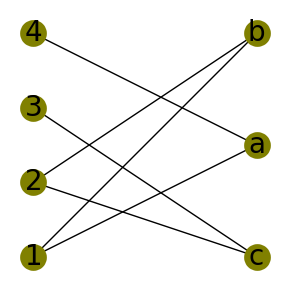

In [516]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
print(nx.bipartite.sets(B))
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
print(pos)
G_drawing(B,pos=pos)

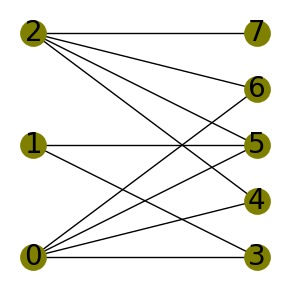

In [513]:
G = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
G_drawing(G,pos=pos)

除了用`networkx.bipartite.sets`方法获取顶点集，也可以直接使用顶点属性的方法提取。

In [520]:
top_nodes={n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes=set(B)-top_nodes
print(top_nodes,bottom_nodes)

{1, 2, 3, 4} {'c', 'a', 'b'}


* Basic functions（基本函数）

`is_bipartite`(G)：判断是否为二部图。

`is_bipartite_node_set`(G, nodes)：判断顶点集是否为二分部顶点集。

`sets`(G[, top_nodes])：返回顶点集。

`color`(G)：返回二部图顶点集染色（ two-coloring）。

`density`(B, nodes)：返回二部图的密度。

`degrees`(B, nodes[, weight])：返回二部图顶点集顶点的度值。

In [531]:
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(B)) 
print(bipartite.is_bipartite_node_set(B, top_nodes))
print(bipartite.sets(B))
print(bipartite.color(B))
print(bipartite.density(B,top_nodes))
print(bipartite.density(B, bottom_nodes))
print(bipartite.degrees(B, top_nodes))

True
True
({1, 2, 3, 4}, {'c', 'a', 'b'})
{1: 1, 'a': 0, 'b': 0, 2: 1, 'c': 0, 3: 1, 4: 1}
0.5
0.5
(DegreeView({'c': 2, 'a': 2, 'b': 2}), DegreeView({1: 2, 2: 2, 3: 1, 4: 1}))


* Edgelist （边集）

`generate_edgelist`(G[, delimiter, data])：
以列表形式返回二部图的边，可以指定返回边的属性值。

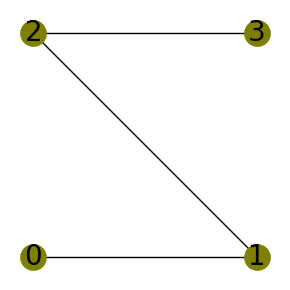

['0 1', '2 1', '2 3']
['0 1 {}', "2 1 {'weight': 3}", "2 3 {'capacity': 12}"]
['0 1', '2 1 3', '2 3']


In [541]:
from networkx.algorithms import bipartite
G=nx.path_graph(4)
G.add_nodes_from([0, 2], bipartite=0)
G.add_nodes_from([1, 3], bipartite=1)
G[1][2]["weight"] = 3
G[2][3]["capacity"] = 12
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
print(list(bipartite.generate_edgelist(G, data=False)))
print(list(bipartite.generate_edgelist(G, data=True)))
print(list(bipartite.generate_edgelist(G, data=['weight'])))

`write_edgelist`(G, path[, comments, ...])：将二部图边集合写入至文件。

`read_edgelist`(path[, comments, delimiter, ...])：配合`write_edgelist`方法读取边集合文件为二部图。

In [552]:
nx.write_edgelist(G, "./data/test.edgelist")

['0 1 {}\n', "1 2 {'weight': 3}\n", "2 3 {'capacity': 12}\n"]


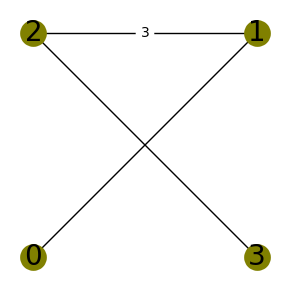

In [559]:
fh=open("./data/test.edgelist", "r")
print(fh.readlines())
G=bipartite.read_edgelist("./data/test.edgelist")
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')

`parse_edgelist`(lines[, comments, delimiter, ...])：例如以["1 2", "2 3", "3 4","3 5"]或["1 2 {'weight':3}", "2 3 {'weight':27}", "3 4 {'weight':3.0}"]，及["1 2 3", "2 3 27", "3 4 3.0","3 5"]等方式传入，自动解析构建二部图。

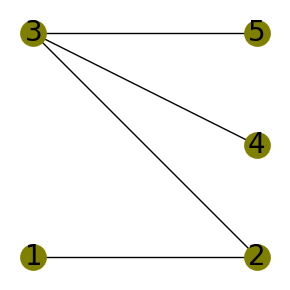

In [555]:
from networkx.algorithms import bipartite
lines=["1 2", "2 3", "3 4","3 5"]
G=bipartite.parse_edgelist(lines, nodetype=int)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)

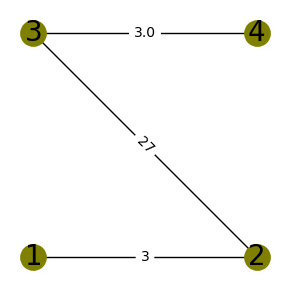

In [556]:
lines=["1 2 {'weight':3}", "2 3 {'weight':27}", "3 4 {'weight':3.0}"]
G=bipartite.parse_edgelist(lines, nodetype=int)
G = nx.complete_bipartite_graph(2, 3)

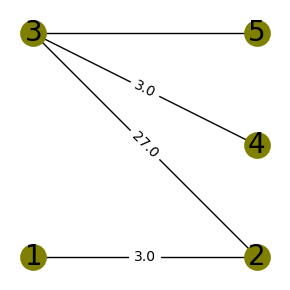

In [558]:
lines=["1 2 3", "2 3 27", "3 4 3.0","3 5"]
G=bipartite.parse_edgelist(lines, nodetype=int, data=(("weight", float),))
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')

* Matching（匹配）

匹配是一组不共享任何节点的边，即边指向一个点成为匹配，已匹配的点不能够再次匹配。最大基数匹配是一个与尽可能多的边的匹配。它并不总是独一无二的。在二部图中寻找匹配可以看作是一个networkx流问题。

`eppstein_matching`(G[, top_nodes])：返回二部图的最大基数匹配。 

`hopcroft_karp_matching`(G[, top_nodes])<sup>[25]</sup>：返回二部图的最大基数匹配。

`maximum_matching`(G[, top_nodes])： 返回给定二部图中的最大基数匹配。

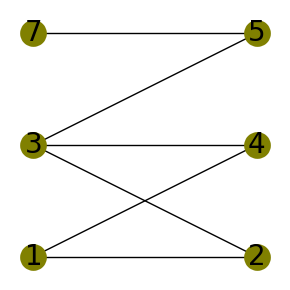

{2: 1, 4: 3, 5: 7, 1: 2, 3: 4, 7: 5}
{1: 2, 3: 4, 7: 5, 2: 1, 4: 3, 5: 7}
{1: 2, 3: 4, 7: 5, 2: 1, 4: 3, 5: 7}


In [571]:
from networkx.algorithms.bipartite.matching import eppstein_matching,hopcroft_karp_matching
from networkx.algorithms import bipartite
lines=["1 2", "2 3", "3 4","3 5","1 4","5 7"]
G=bipartite.parse_edgelist(lines, nodetype=int)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
print(eppstein_matching(G))
print(hopcroft_karp_matching(G))
print(nx.bipartite.maximum_matching(G))

`to_vertex_cover`(G, matching[, top_nodes])：返回与二部图的给定最大匹配对应的最小顶点覆盖。

> 参考Vertex Cover（顶点覆盖）部分。

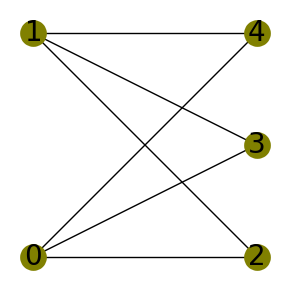

{0: 2, 1: 3, 2: 0, 3: 1}
{0, 1}
[2, 3, 4]


In [569]:
G=nx.complete_bipartite_graph(2, 3)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
matching=nx.bipartite.maximum_matching(G)
print(matching)
vertex_cover=nx.bipartite.to_vertex_cover(G, matching)
print(vertex_cover)
independent_set=set(G) - vertex_cover
print(list(independent_set))

`minimum_weight_full_matching`(G[, top_nodes, ...])<sup>[26]</sup>：返回二部图的最小权重完全匹配，即使得匹配中包含的边的权重之和最小化。

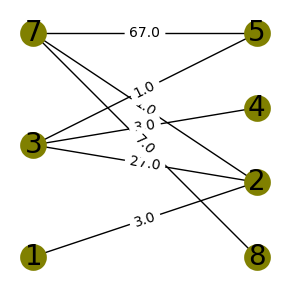

{1: 2, 3: 5, 7: 8, 2: 1, 5: 3, 8: 7}

In [582]:
from networkx.algorithms.bipartite.matching import minimum_weight_full_matching
lines=["1 2 3", "2 3 27", "3 4 3.0","3 5 1","5 7 67","7 2 1","7 8 7"]
G=bipartite.parse_edgelist(lines, nodetype=int, data=(("weight", float),))
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
minimum_weight_full_matching(G)

* Matrix（矩阵）

`biadjacency_matrix`(G, row_order[, ...])<sup>[27][28]</sup>：返回二部图的双相邻矩阵（biadjacency matrix）。

$G=(U, V, E)$二部图，有顶点集$U= \big\{ u_{1}, \cdots , u_{r}  \big\} $，$V= \big\{ v_{1}, \cdots , v_{s}  \big\} $和边集$E$。双相邻矩阵为$r \times s$维度的矩阵$B$，且$b_{i,j} =1$，$( u_{i},v_{j} ) \in E$。

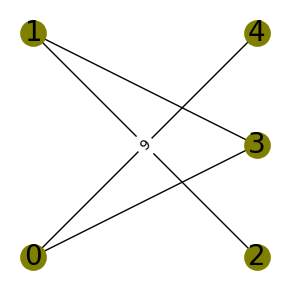

  (0, 0)	1
  (0, 1)	1
  (1, 1)	1
  (1, 2)	9
--------------------------------------------------
  (0, 1)	1
  (0, 2)	9
  (1, 0)	1
  (1, 1)	1


C:\Users\richi\AppData\Local\Temp\ipykernel_13596\2641339330.py:6: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(biadjacency_matrix(G,[1,0]))
C:\Users\richi\AppData\Local\Temp\ipykernel_13596\2641339330.py:8: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(biadjacency_matrix(G,[0,1]))


In [597]:
from networkx.algorithms.bipartite.matrix import biadjacency_matrix
G=nx.bipartite.gnmk_random_graph(2, 3, 3, seed=123)
G.add_weighted_edges_from([(0,4,9)])
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
print(biadjacency_matrix(G,[1,0]))
print('-'*50)
print(biadjacency_matrix(G,[0,1]))

`from_biadjacency_matrix`(A[, create_using, ...])：以SciPy稀疏矩阵给出的双相邻矩阵创建新的二部图。

C:\Users\richi\AppData\Local\Temp\ipykernel_13596\3733428173.py:2: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  B=from_biadjacency_matrix(biadjacency_matrix(G,[0,1]))


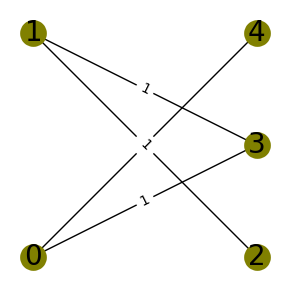

In [600]:
from networkx.algorithms.bipartite.matrix import from_biadjacency_matrix
B=from_biadjacency_matrix(biadjacency_matrix(G,[0,1]))
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')

* Projections（投影）

`projected_graph`(B, nodes[, multigraph])：返回二部图B在指定顶点集上的投影。如果在图B中有公共邻居，则保留其属性，在返回图中保持其连接。对于参数`multigraph`，如果配置为True，则返回多重图（ multigraph），其中多条边表示多个共享邻居。

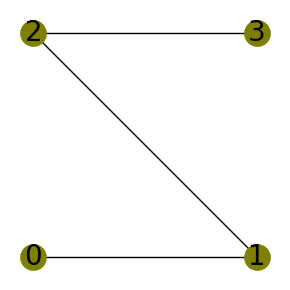

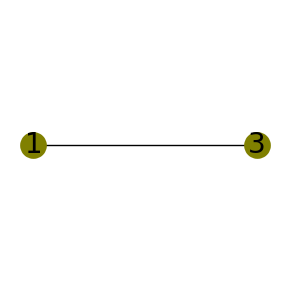

[1, 3]
[(1, 3)]


In [612]:
from networkx.algorithms import bipartite
B=nx.path_graph(4)
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')
G=bipartite.projected_graph(B, [1, 3])
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
print(list(G))
print(list(G.edges()))

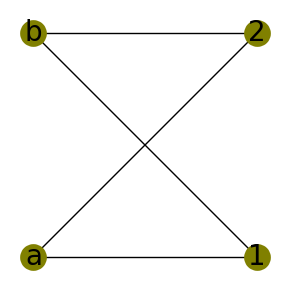

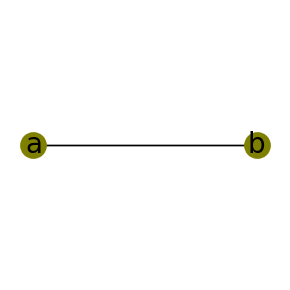

[['a', 'b'], ['a', 'b']]


In [614]:
B=nx.Graph()
B.add_edges_from([("a", 1), ("b", 1), ("a", 2), ("b", 2)])
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')
G=bipartite.projected_graph(B, ["a", "b"], multigraph=True)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
print([sorted((u, v)) for u, v in G.edges()])

`weighted_projected_graph`(B, nodes[, ratio])<sup>[29]</sup>：返回二部图B在其一个节点集上的加权投影。如果参数`ratio`为默认False，则边权重为共享邻居的数量；如果为True，则为实际共享邻居与最大可能共享邻居之间的比率。

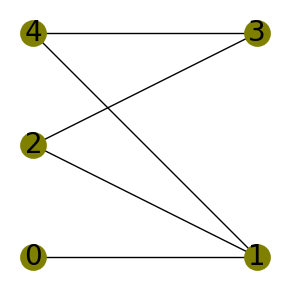

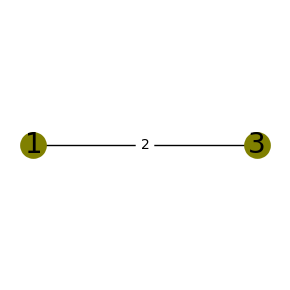

[1, 3]
[(1, 3, {'weight': 2})]


In [621]:
from networkx.algorithms import bipartite
B=nx.path_graph(4)
B.add_nodes_from([4], bipartite=0)
B.add_edges_from([(3,4),(1,4)])
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')
G=bipartite.weighted_projected_graph(B, [1, 3])
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
print(list(G))
print(list(G.edges(data=True)))

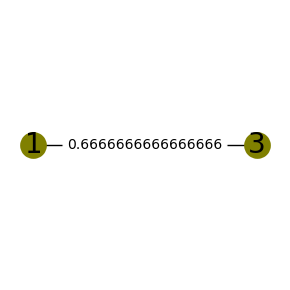

[(1, 3, {'weight': 0.6666666666666666})]

In [622]:
G=bipartite.weighted_projected_graph(B, [1, 3], ratio=True)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
list(G.edges(data=True))

`collaboration_weighted_projected_graph`(B, nodes)：返回二部图B在其一个节点集上基于Newman的加权投影，使用Newman协作模型（Newman’s collaboration model）计算权重<sup>[30]</sup>。

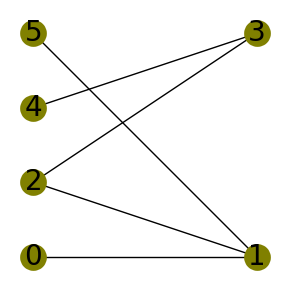

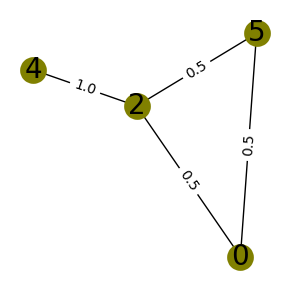

[(0, 2, {'weight': 0.5}),
 (0, 5, {'weight': 0.5}),
 (2, 4, {'weight': 1.0}),
 (2, 5, {'weight': 0.5})]

In [631]:
from networkx.algorithms import bipartite
B=nx.path_graph(5)
B.add_edge(1, 5)
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')
G=bipartite.collaboration_weighted_projected_graph(B, [0, 2, 4, 5])
G_drawing(G,edge_labels='weight')
sorted(G.edges(data=True))

`overlap_weighted_projected_graph`(B, nodes[, ...])：返回二部图B在其一个节点集上的重叠加权投影，其重叠加权（overlap weighted）为原二部图中两个顶点邻域之间的Jaccard指数<sup>[31]</sup>。

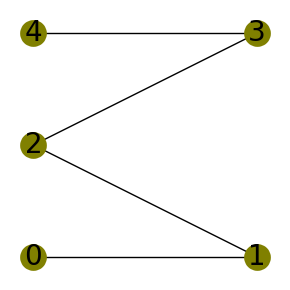

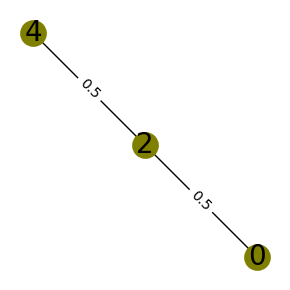

[0, 2, 4]
[(0, 2, {'weight': 0.5}), (2, 4, {'weight': 0.5})]


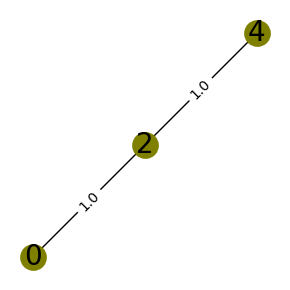

[(0, 2, {'weight': 1.0}), (2, 4, {'weight': 1.0})]


In [632]:
from networkx.algorithms import bipartite
B=nx.path_graph(5)
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')
nodes=[0, 2, 4]
G=bipartite.overlap_weighted_projected_graph(B, nodes)
G_drawing(G,edge_labels='weight')
print(list(G))
print(list(G.edges(data=True)))
G=bipartite.overlap_weighted_projected_graph(B, nodes, jaccard=False)
G_drawing(G,edge_labels='weight')
print(list(G.edges(data=True)))

`generic_weighted_projected_graph`(B, nodes[, ...])：使用用户指定的权重函数，返回二部图B在其一个节点集上的加权投影。

* Spectral（谱度量）

`spectral_bipartivity`(G[, nodes, weight])<sup>[32]</sup>：二分性谱度量（spectral bipartivity）。

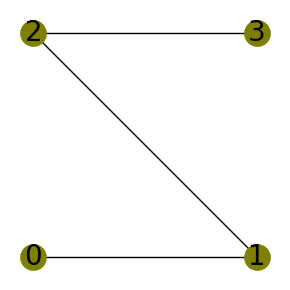

1.0
{0: 1.0, 1: 1.0}


In [651]:
from networkx.algorithms import bipartite
G=nx.path_graph(4)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,edge_labels='weight')
print(bipartite.spectral_bipartivity(G))
print(bipartite.spectral_bipartivity(G,[0,1]))

* Clustering (聚类)

`clustering`(G[, nodes, mode])：计算二部图顶点聚类系数，为连接的局部密度度量，公式为：$c_u = \frac{\sum_{v \in N(N(u))} c_{uv} }{|N(N(u))|}$，式中，$N(N(u))$为除了$u$图G中$u$的二阶邻居；$c_{uv} $为顶点$u$和$v$之间成对的聚类系数，该聚类系数的计算即参数`mode`包括3种，为`dot`、`min`和`max`，计算公式分别为：$(dot)c_{uv}=\frac{|N(u)\cap N(v)|}{|N(u) \cup N(v)|}$，$(min)c_{uv}=\frac{|N(u)\cap N(v)|}{min(|N(u)|,|N(v)|)}$和$(max)c_{uv}=\frac{|N(u)\cap N(v)|}{max(|N(u)|,|N(v)|)}$<sup>[33]</sup>。

`latapy_clustering`(G[, nodes, mode])<sup>[33]</sup>：计算二部图顶点的聚类系数。




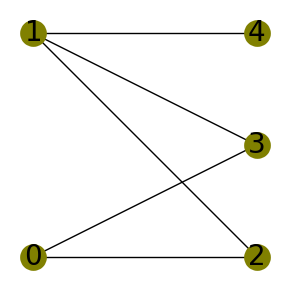

{0: 0.6666666666666666, 1: 0.6666666666666666, 2: 0.75, 3: 0.75, 4: 0.5}
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
{0: 0.6666666666666666, 1: 0.6666666666666666, 2: 0.75, 3: 0.75, 4: 0.5}


In [663]:
from networkx.algorithms import bipartite
G=nx.bipartite.gnmk_random_graph(2,3,5, seed=123)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
print(bipartite.clustering(G))
print(bipartite.clustering(G,mode='min'))
print(bipartite.clustering(G,mode='max'))

In [664]:
bipartite.latapy_clustering(G)

{0: 0.6666666666666666, 1: 0.6666666666666666, 2: 0.75, 3: 0.75, 4: 0.5}

`average_clustering`(G[, nodes, mode])：计算平均二部图聚类系数。整个图的聚类系数均值为：$C = \frac{1}{n}\sum_{v \in G} c_v$，式中$n$为图G顶点数量。类似，对于二部图各顶点集的聚类系数均值计算公式为：$C_X = \frac{1}{|X|}\sum_{v \in X} c_v$，式中$X$是二部图一个顶点集<sup>[33]</sup>。

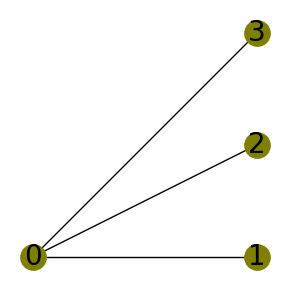

0.75
0.0
1.0


In [662]:
from networkx.algorithms import bipartite
G=nx.star_graph(3)  # star graphs are bipartite
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
print(bipartite.average_clustering(G))

X, Y = bipartite.sets(G)
print(bipartite.average_clustering(G, X))
print(bipartite.average_clustering(G, Y))

`robins_alexander_clustering`(G)：计算图G的二部聚类。Robins和Alexander将其定义为：$CC_4 = \frac{4 * C_4}{L_3}$，式中$C_4$为4圈（cycles ），$L_3$为3路（paths）<sup>[34]</sup>。

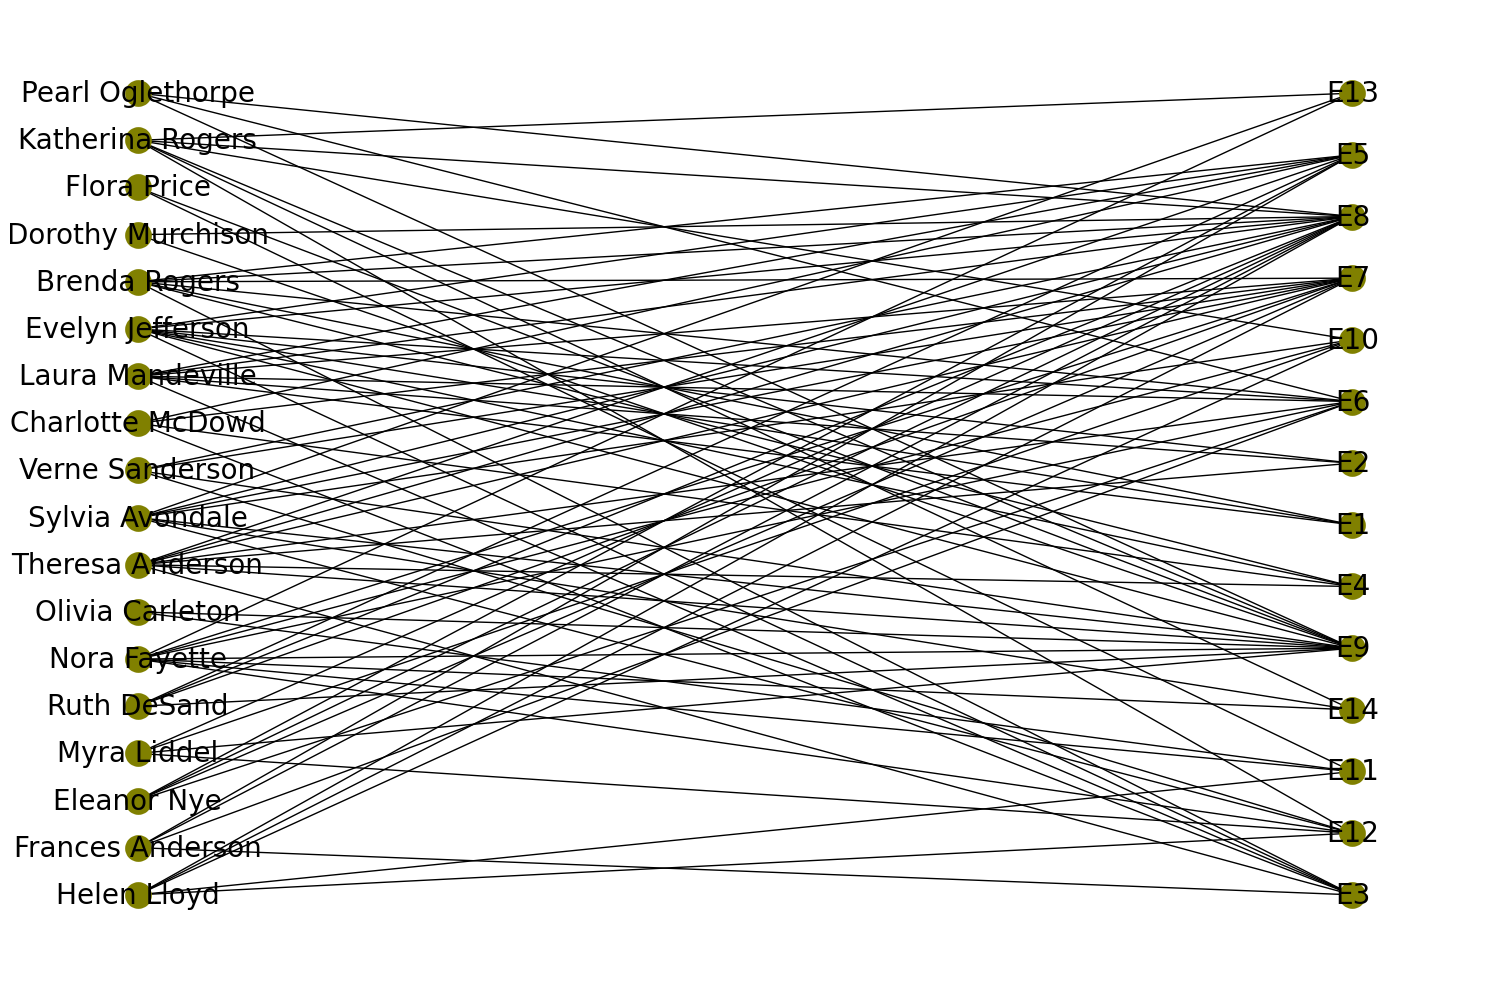

0.468


In [669]:
from networkx.algorithms import bipartite
G=nx.davis_southern_women_graph()
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos,figsize=(15,10))
print(round(bipartite.robins_alexander_clustering(G), 3))

* Redundancy（冗余）

`node_redundancy`(G[, nodes])<sup>[33]</sup>：计算二部图中顶点的顶点冗余系数。

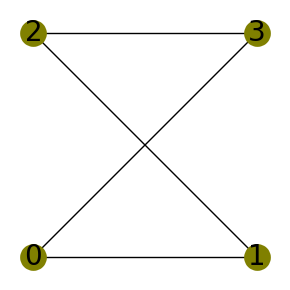

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}
1.0
1.0


In [677]:
from networkx.algorithms import bipartite
G=nx.cycle_graph(4)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
rc=bipartite.node_redundancy(G)
print(rc)
print(sum(rc.values()) / len(G))
nodes=[0, 2]
print(sum(rc[n] for n in nodes) / len(nodes))

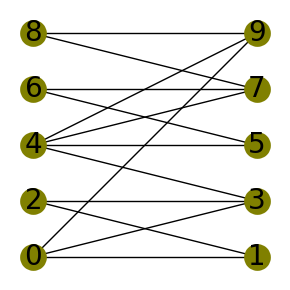

{0: 0.6666666666666666, 1: 1.0, 2: 1.0, 3: 0.6666666666666666, 4: 0.5, 5: 1.0, 6: 1.0, 7: 0.6666666666666666, 8: 1.0, 9: 0.6666666666666666}


In [702]:
B=nx.path_graph(10)
B.add_edges_from([(0,3),(0,9),(4,9),(4,7)])
pos=nx.bipartite_layout(B, nx.bipartite.sets(B)[0])
G_drawing(B,pos=pos,edge_labels='weight')
print(bipartite.node_redundancy(B))

* Centrality

`closeness_centrality`(G, nodes[, normalized])：

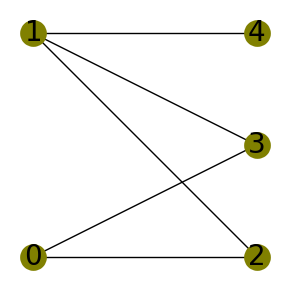

{0: 0.5714285714285714, 1: 0.8, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.5}


In [703]:
G=nx.bipartite.gnmk_random_graph(2,3,5, seed=123)
pos=nx.bipartite_layout(G, nx.bipartite.sets(G)[0])
G_drawing(G,pos=pos)
print(nx.closeness_centrality(G))

---

注释（Notes）：

① 

参考文献（References）:

[1] White, Douglas R., and Mark Newman. 2001 A Fast Algorithm for Node-Independent Paths. Santa Fe Institute Working Paper #01-07-035.

[2] Torrents, J. and F. Ferraro (2015) Structural Cohesion: Visualization and Heuristics for Fast Computation. https://arxiv.org/pdf/1503.04476v1.

[3] 
White, Douglas R., and Mark Newman (2001) A Fast Algorithm for Node-Independent Paths. Santa Fe Institute Working Paper #01-07-035 https://www.santafe.edu/research/results/working-papers/fast-approximation-algorithms-for-finding-node-ind.

[4] Moody, J. and D. White (2003). Social cohesion and embeddedness: A hierarchical conception of social groups. American Sociological Review 68(1), 103–28. https://doi.org/10.2307/3088904

[5] Wikipedia: Independent set.

[6] Boppana, R., & Halldórsson, M. M. (1992). Approximating maximum independent sets by excluding subgraphs. BIT Numerical Mathematics, 32(2), 180–196. Springer.

[7] Pattabiraman, Bharath, et al. “Fast Algorithms for the Maximum Clique Problem on Massive Graphs with Applications to Overlapping Community Detection.” Internet Mathematics 11.4-5 (2015): 421–448. <https://doi.org/10.1080/15427951.2014.986778>.

[8] Schank, Thomas, and Dorothea Wagner. Approximating clustering coefficient and transitivity. Universität Karlsruhe, Fakultät für Informatik, 2004. https://doi.org/10.5445/IR/1000001239

[9] Magnien, Clémence, Matthieu Latapy, and Michel Habib. Fast computation of empirically tight bounds for the diameter of massive graphs. Journal of Experimental Algorithmics (JEA), 2009. https://arxiv.org/pdf/0904.2728.pdf.

[10] Crescenzi, Pierluigi, Roberto Grossi, Leonardo Lanzi, and Andrea Marino. On computing the diameter of real-world directed (weighted) graphs. International Symposium on Experimental Algorithms. Springer, Berlin, Heidelberg, 2012. https://courses.cs.ut.ee/MTAT.03.238/2014_fall/uploads/Main/diameter.pdf.

[11] Vazirani, Vijay V. Approximation Algorithms. Springer Science & Business Media, 2001.

[12] Matching (graph theory)，https://en.wikipedia.org/wiki/Matching_(graph_theory).

[13] Steiner_tree_problem on Wikipedia. https://en.wikipedia.org/wiki/Steiner_tree_problem.

[14] A. Asadpour, M. X. Goemans, A. Madry, S. O. Gharan, and A. Saberi, An o(log n/log log n)-approximation algorithm for the asymmetric traveling salesman problem, Operations research, 65 (2017), pp. 1043–1061.

[15] Wikipedia: Treewidth, https://en.wikipedia.org/wiki/Treewidth.

[16] Hans L. Bodlaender and Arie M. C. A. Koster. 2010. “Treewidth computations I.Upper bounds”. Inf. Comput. 208, 3 (March 2010),259-275. http://dx.doi.org/10.1016/j.ic.2009.03.008.

[17] Hans L. Bodlaender. “Discovering Treewidth”. Institute of Information and Computing Sciences, Utrecht University. Technical Report UU-CS-2005-018. http://www.cs.uu.nl.

[18] K. Wang, Z. Lu, and J. Hicks Treewidth. https://web.archive.org/web/20210507025929/http://web.eecs.utk.edu/~cphill25/cs594_spring2015_projects/treewidth.pdf.

[19] Vertex cover,Wikipedia, https://en.wikipedia.org/wiki/Vertex_cover.

[20] Bar-Yehuda, R., and Even, S. (1985). “A local-ratio theorem for approximating the weighted vertex cover problem.” Annals of Discrete Mathematics, 25, 27–46 <http://www.cs.technion.ac.il/~reuven/PDF/vc_lr.pdf>.

[21] M. E. J. Newman, Mixing patterns in networks, Physical Review E, 67 026126, 2003

[22] Foster, J.G., Foster, D.V., Grassberger, P. & Paczuski, M. Edge direction and the structure of networks, PNAS 107, 10815-20 (2010).Foster, J.G., Foster, D.V., Grassberger, P. & Paczuski, M. Edge direction and the structure of networks, PNAS 107, 10815-20 (2010).

[23] A. Barrat, M. Barthélemy, R. Pastor-Satorras, and A. Vespignani, “The architecture of complex weighted networks”. PNAS 101 (11): 3747–3752 (2004).

[24] Ekkehard Köhler, “Recognizing Graphs without asteroidal triples”, Journal of Discrete Algorithms 2, pages 439-452, 2004. https://www.sciencedirect.com/science/article/pii/S157086670400019X.

[25] John E. Hopcroft and Richard M. Karp. “An n^{5 / 2} Algorithm for Maximum Matchings in Bipartite Graphs” In: SIAM Journal of Computing 2.4 (1973), pp. 225–231. <https://doi.org/10.1137/0202019>.

[26] Richard Manning Karp: An algorithm to Solve the m x n Assignment Problem in Expected Time O(mn log n). Networks, 10(2):143–152, 1980.

[27] Adjacency matrix, https://en.wikipedia.org/wiki/Adjacency_matrix#Adjacency_matrix_of_a_bipartite_graph.

[28] Scipy Dev. References, “Sparse Matrices”, https://docs.scipy.org/doc/scipy/reference/sparse.html.

[29] Borgatti, S.P. and Halgin, D. In press. “Analyzing Affiliation Networks”. In Carrington, P. and Scott, J. (eds) The Sage Handbook of Social Network Analysis. Sage Publications.

[30] Scientific collaboration networks: II. Shortest paths, weighted networks, and centrality, M. E. J. Newman, Phys. Rev. E 64, 016132 (2001).

[31] Borgatti, S.P. and Halgin, D. In press. Analyzing Affiliation Networks. In Carrington, P. and Scott, J. (eds) The Sage Handbook of Social Network Analysis. Sage Publications.

[32] E. Estrada and J. A. Rodríguez-Velázquez, “Spectral measures of bipartivity in complex networks”, PhysRev E 72, 046105 (2005).

[33] Latapy, Matthieu, Clémence Magnien, and Nathalie Del Vecchio (2008). Basic notions for the analysis of large two-mode networks. Social Networks 30(1), 31–48.

[34] Robins, G. and M. Alexander (2004). Small worlds among interlocking directors: Network structure and distance in bipartite graphs. Computational & Mathematical Organization Theory 10(1), 69–94.